# E-Commerce Product Delivery Prediction

In [49]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [51]:
data=pd.read_csv('E_Commerce.csv')

In [53]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# data preprocessing 1

In [55]:
data.shape

(10999, 12)

In [57]:
data.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [59]:
data.drop(['ID'],axis=1,inplace=True)

In [61]:
data.shape

(10999, 11)

In [73]:
data.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [77]:
data.duplicated().sum()

0

In [79]:
data.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [83]:
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


# Exploratory Data Analysis

Text(0.5, 1.0, 'Gender Distribution')

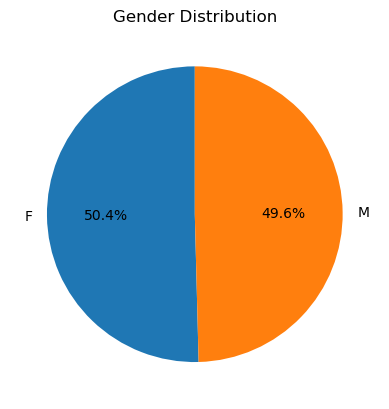

In [88]:
plt.pie(data['Gender'].value_counts(),labels = ['F','M'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

### Product Properties

Text(0.5, 1.0, 'Cost of the Product')

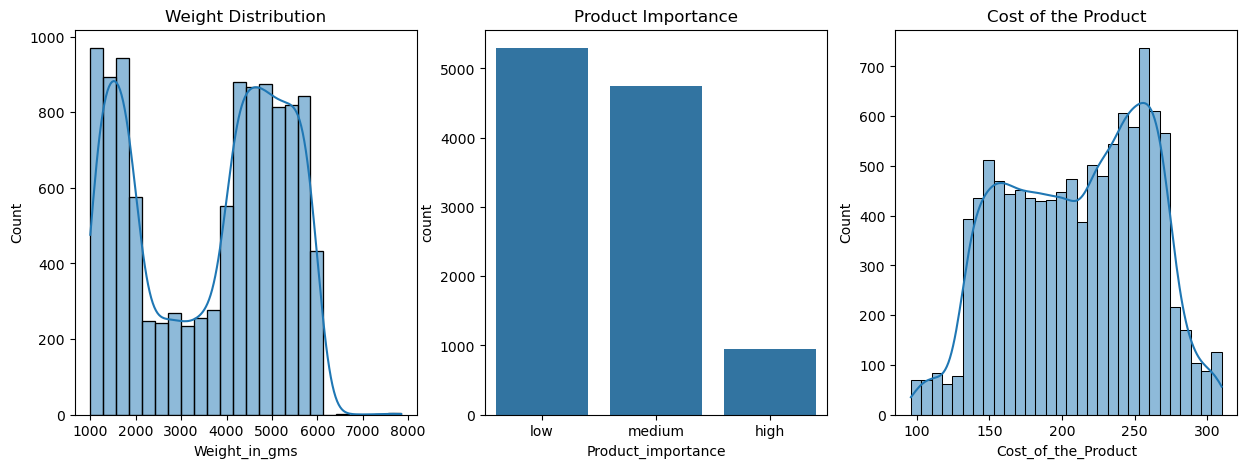

In [94]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sn.histplot(data['Weight_in_gms'], ax=ax[0], kde=True).set_title('Weight Distribution')
sn.countplot(x = 'Product_importance', data = data, ax=ax[1]).set_title('Product Importance')
sn.histplot(data['Cost_of_the_Product'], ax=ax[2], kde=True).set_title('Cost of the Product')

### Logistics

Text(0.5, 1.0, 'Reached on Time')

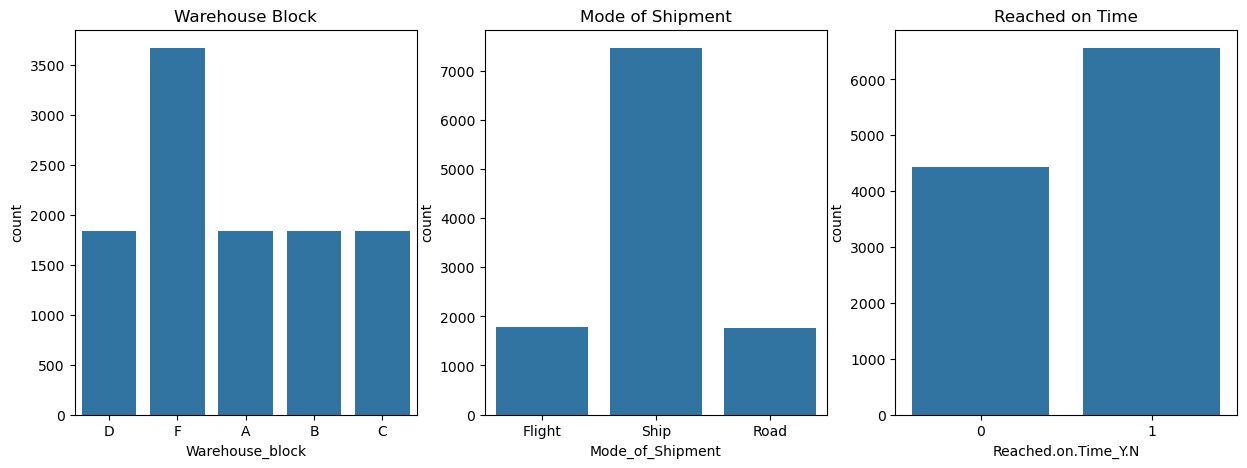

In [98]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sn.countplot(x = 'Warehouse_block', data = data, ax=ax[0]).set_title('Warehouse Block')
sn.countplot(x = 'Mode_of_Shipment', data = data, ax=ax[1]).set_title('Mode of Shipment')
sn.countplot(x = 'Reached.on.Time_Y.N', data = data, ax=ax[2]).set_title('Reached on Time')

### Customer Experience

Text(0.5, 1.0, 'Discount Offered')

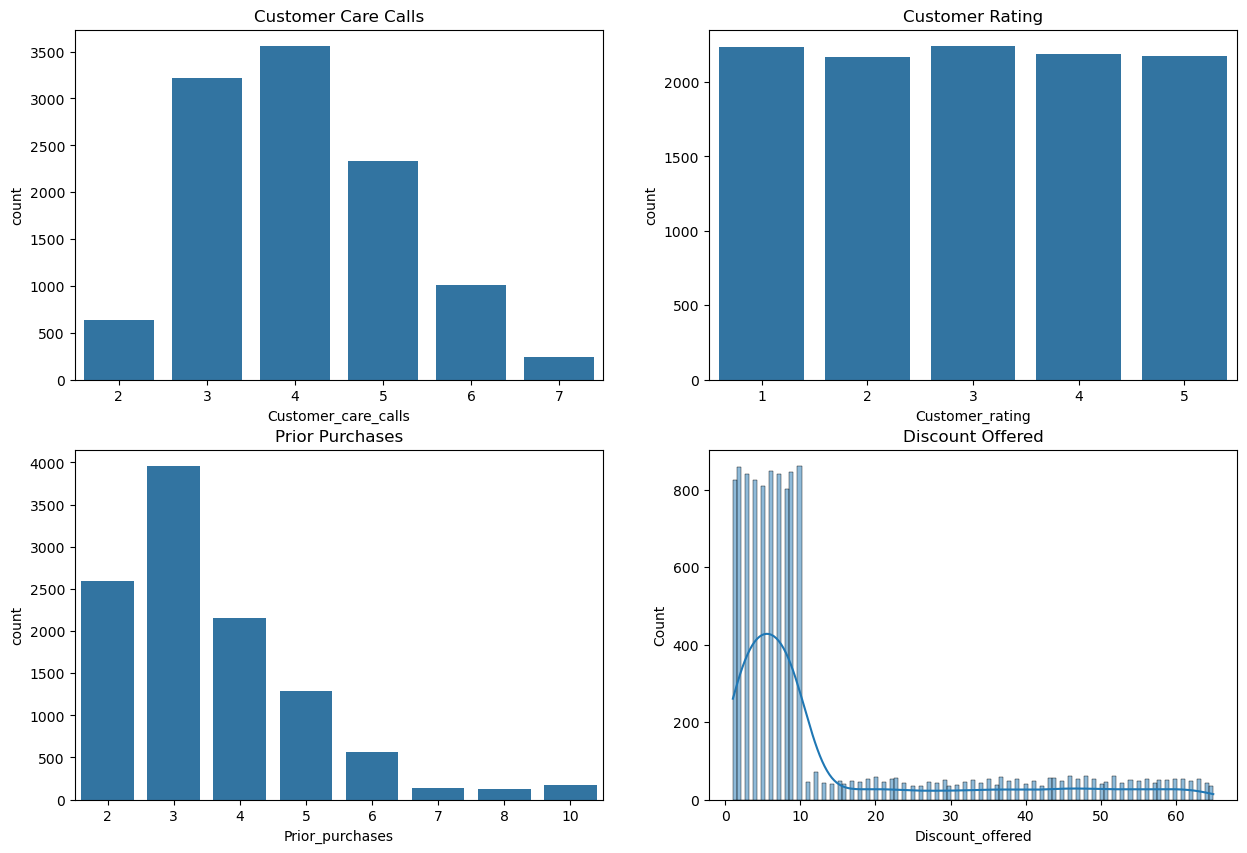

In [101]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sn.countplot(x = 'Customer_care_calls', data = data, ax=ax[0,0]).set_title('Customer Care Calls')
sn.countplot(x = 'Customer_rating', data = data, ax=ax[0,1]).set_title('Customer Rating')
sn.countplot(x = 'Prior_purchases', data = data, ax=ax[1,0]).set_title('Prior Purchases')
sn.histplot(x = 'Discount_offered', data = data, ax=ax[1,1], kde = True).set_title('Discount Offered')

### Customer Gender and Product Delivery

Text(0.5, 1.0, 'Gender vs Reached on Time')

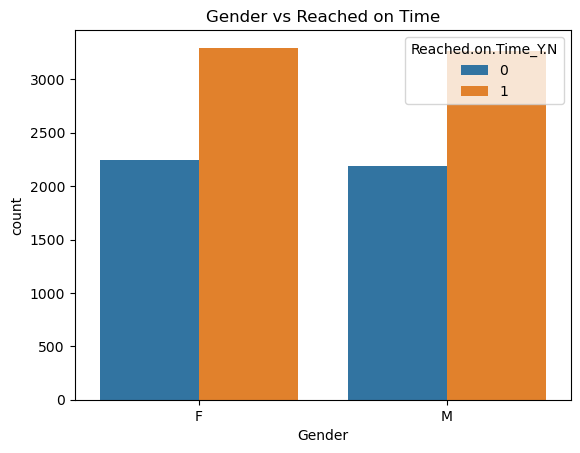

In [104]:
sn.countplot(x = 'Gender', data = data, hue = 'Reached.on.Time_Y.N').set_title('Gender vs Reached on Time')

### Product Properties and Product Delivery

Text(0.5, 1.0, 'Cost of the Product')

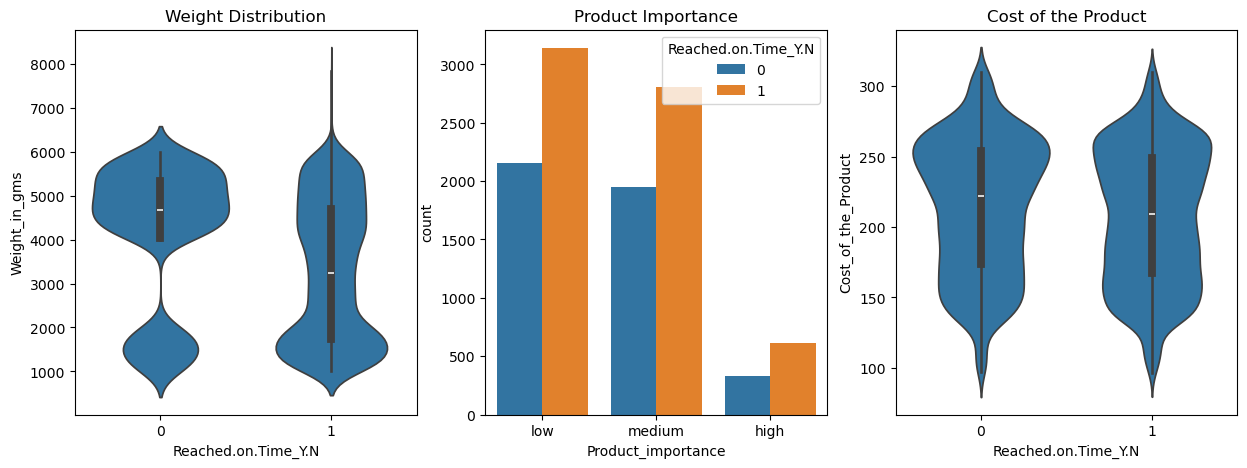

In [113]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sn.violinplot(y = data['Weight_in_gms'], ax=ax[0], x = data['Reached.on.Time_Y.N']).set_title('Weight Distribution')
sn.countplot(x = 'Product_importance', data = data, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Product Importance')
sn.violinplot(y = data['Cost_of_the_Product'], ax=ax[2], x = data['Reached.on.Time_Y.N']).set_title('Cost of the Product')

### Logistics and Product Delivery

Text(0.5, 1.0, 'Mode of Shipment')

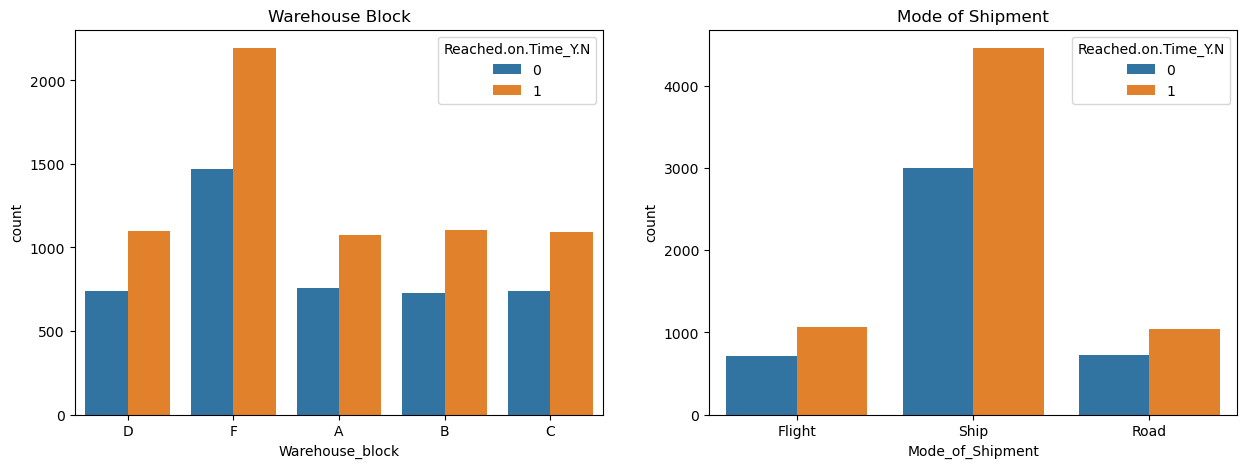

In [118]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sn.countplot(x = 'Warehouse_block', data = data, ax=ax[0], hue = 'Reached.on.Time_Y.N').set_title('Warehouse Block')
sn.countplot(x = 'Mode_of_Shipment', data = data, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Mode of Shipment')

### Customer Experience and Product Delivery

Text(0.5, 1.0, 'Discount Offered')

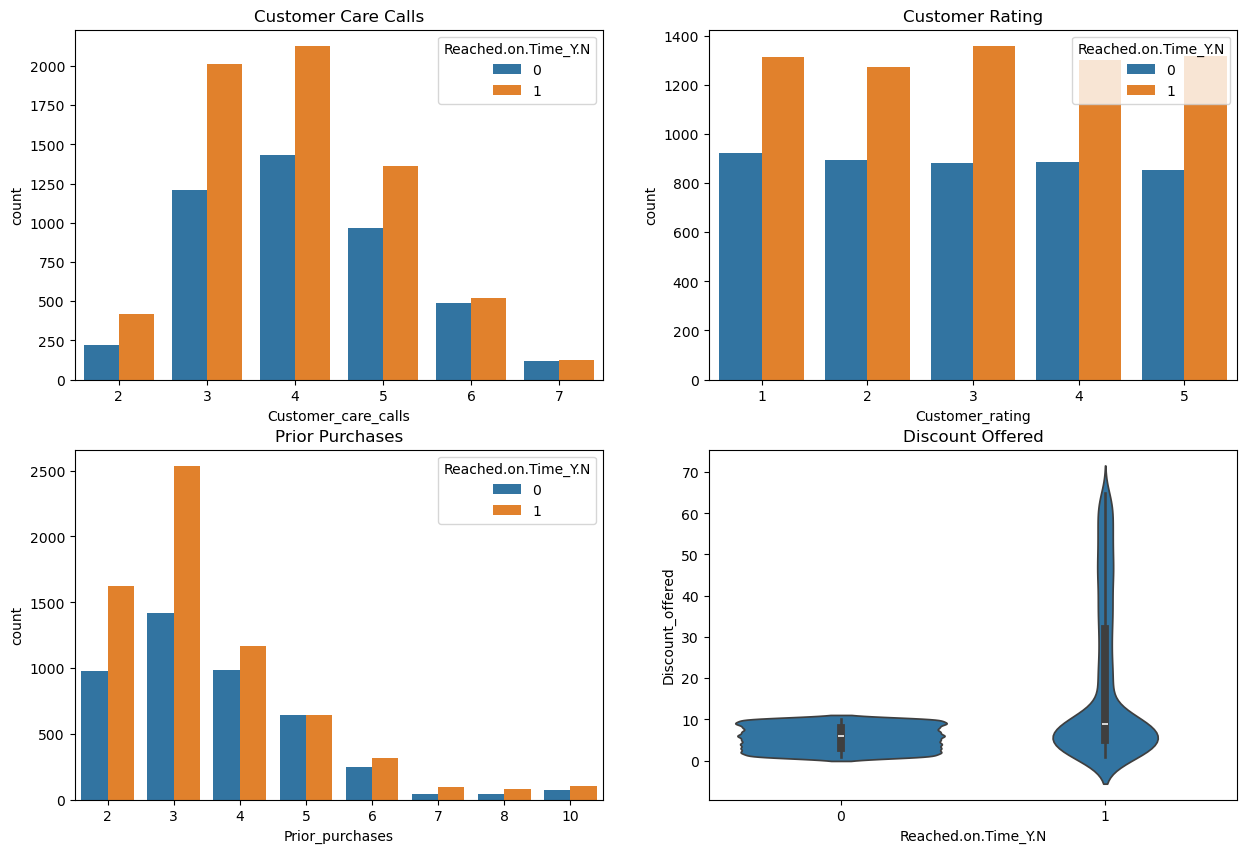

In [121]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sn.countplot(x = 'Customer_care_calls', data = data, ax=ax[0,0],hue = 'Reached.on.Time_Y.N').set_title('Customer Care Calls')
sn.countplot(x = 'Customer_rating', data = data, ax=ax[0,1],hue = 'Reached.on.Time_Y.N').set_title('Customer Rating')
sn.countplot(x = 'Prior_purchases', data = data, ax=ax[1,0],hue = 'Reached.on.Time_Y.N').set_title('Prior Purchases')
sn.violinplot(x = 'Reached.on.Time_Y.N', y = 'Discount_offered' ,data = data, ax=ax[1,1]).set_title('Discount Offered')